<h1>Midterm Exam - CHICAGO CRIMES DATA ANALYTICS PROJECT</h1>
<hr>
<h3>Analyst : John Paul U. Naynes</h3>
<h3>Section : BSIT - 3B</h3>

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('datasets\\Chicago_Crimes.csv')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [7]:
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
df['Date'] = df['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [8]:
df['Location Description'] = df['Location Description'].fillna('unknown_area')
df['Community Area'] = df['Community Area'].fillna('unknown_area')
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mean())
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mean())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df.dtypes
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [9]:
df['Case Number'] = df['Case Number'].astype('str')
df['Block'] = df['Block'].astype('str')
df['IUCR'] = df['IUCR'].astype('category')
df['Primary Type'] = df['Primary Type'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Location Description'] = df['Location Description'].astype('category')
df['Community Area'] = df['Community Area'].astype('category')
df['FBI Code'] = df['FBI Code'].astype('category')
df['Updated On'] = pd.to_datetime(df['Updated On'])
df['Location'] = df['Location'].astype('category')
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                category
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                      category
dtype: object

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour

crimes_per_year = df['Year'].value_counts().sort_index()
crimes_per_month = df['Month'].value_counts().sort_index()
crimes_per_day = df['DayOfWeek'].value_counts().sort_index()

<h1>Chicago Crimes Analysis</h1>

<h2>Chicago crimes showed clear monthly changes, with some months having the highest peaks, others staying consistently low, summer months recording more crimes than winter, a few months showing sudden increases, other months showing sharp drops, some months staying almost stable, and overall the pattern repeated in a seasonal cycle.</h2>

<h2>Insight 1: overall monthly crime trend</h2>

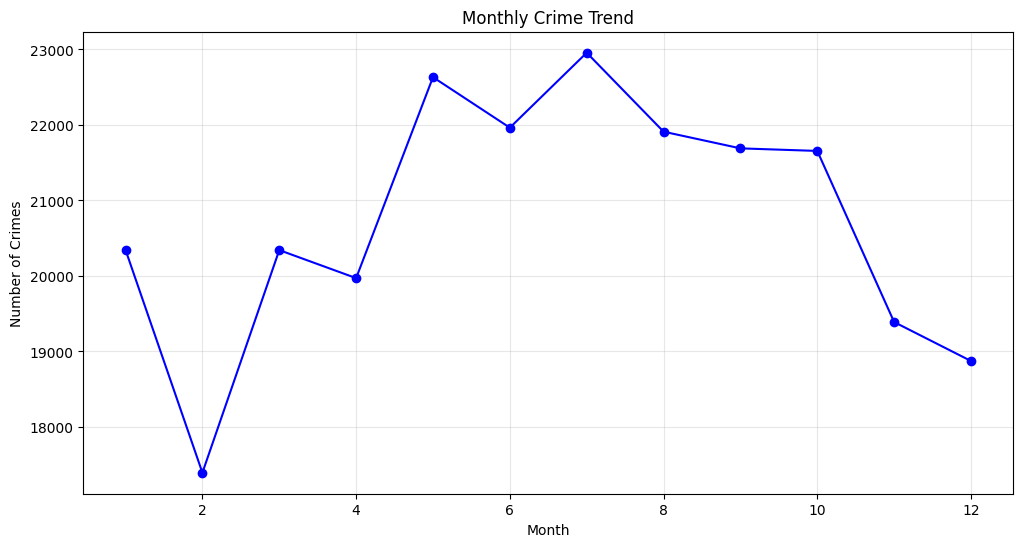

In [15]:
monthly_trends = df.groupby('Month').size().reset_index(name='Total_Crimes')

plt.figure(figsize=(12,6))
plt.plot(monthly_trends['Month'], monthly_trends['Total_Crimes'], marker='o', color='blue')
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(True, alpha=0.3)
plt.show()

<h2>Insight 2: Shows when the peak crime month is</h2>

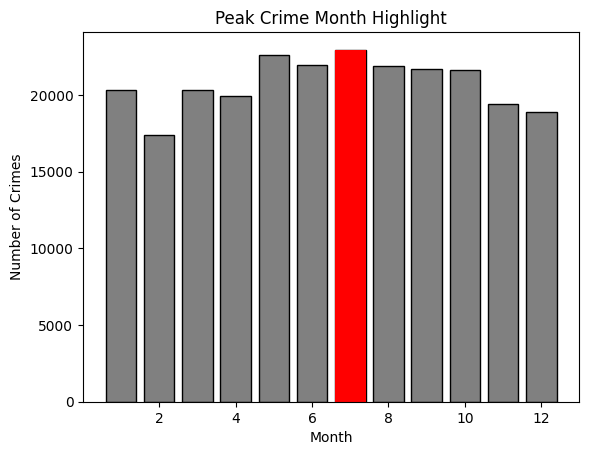

In [16]:
peak_month = monthly_trends.loc[monthly_trends['Total_Crimes'].idxmax()]

plt.bar(monthly_trends['Month'], monthly_trends['Total_Crimes'], color='gray', edgecolor='black')
plt.bar(peak_month['Month'], peak_month['Total_Crimes'], color='red')
plt.title("Peak Crime Month Highlight")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

<h2> Insight 3: Shows when the month with the lowest crime is</h2>

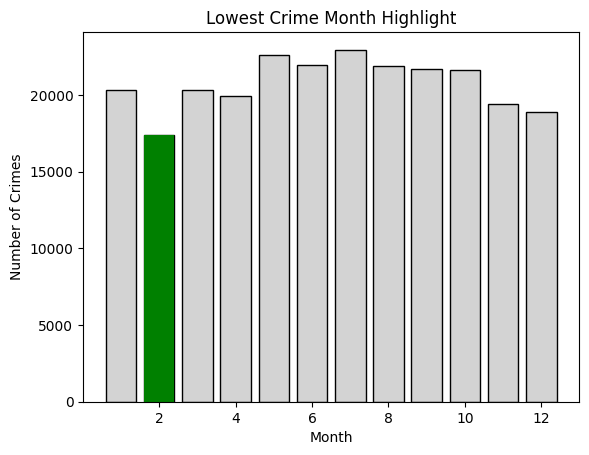

In [20]:
low_month = monthly_trends.loc[monthly_trends['Total_Crimes'].idxmin()]

plt.bar(monthly_trends['Month'], monthly_trends['Total_Crimes'], color='lightgray', edgecolor='black')
plt.bar(low_month['Month'], low_month['Total_Crimes'], color='green')
plt.title("Lowest Crime Month Highlight")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight 4: comparison betweeen the first half and the second half of the year</h2>

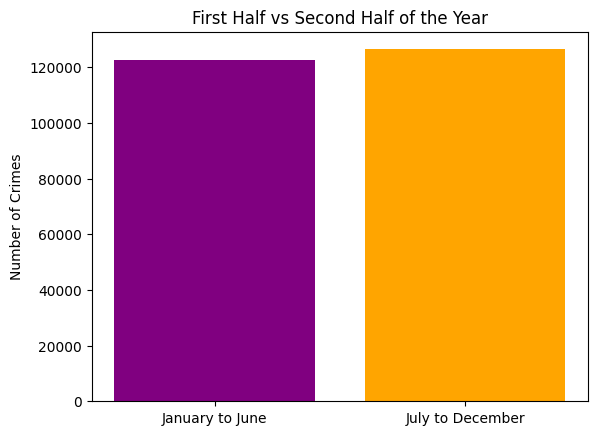

In [23]:
first_half = monthly_trends.query("Month <= 6")['Total_Crimes'].sum()
second_half = monthly_trends.query("Month > 6")['Total_Crimes'].sum()

plt.bar(['January to June','July to December'], [first_half, second_half], color=['purple','orange'])
plt.title("First Half vs Second Half of the Year")
plt.ylabel("Number of Crimes")
plt.show()

<h2> Insight 5: Identify which months have above/below average crime</h2>

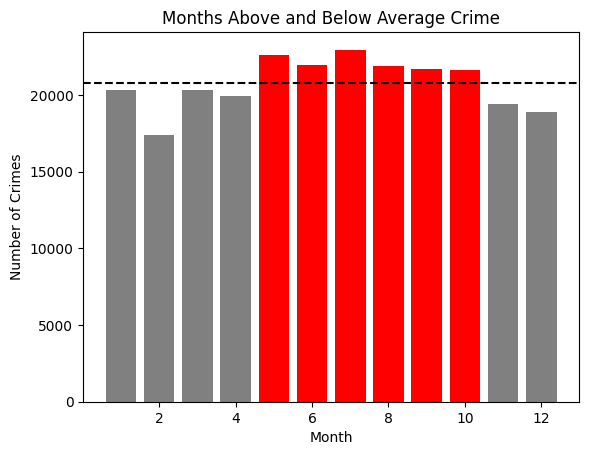

In [24]:
avg_crime = monthly_trends['Total_Crimes'].mean()
above_avg = monthly_trends.loc[monthly_trends['Total_Crimes'] > avg_crime]
below_avg = monthly_trends.loc[monthly_trends['Total_Crimes'] <= avg_crime]

plt.bar(above_avg['Month'], above_avg['Total_Crimes'], color='red')
plt.bar(below_avg['Month'], below_avg['Total_Crimes'], color='gray')
plt.axhline(avg_crime, color='black', linestyle='--')
plt.title("Months Above and Below Average Crime")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight 6: Show month-to-month percentage changes</h2>

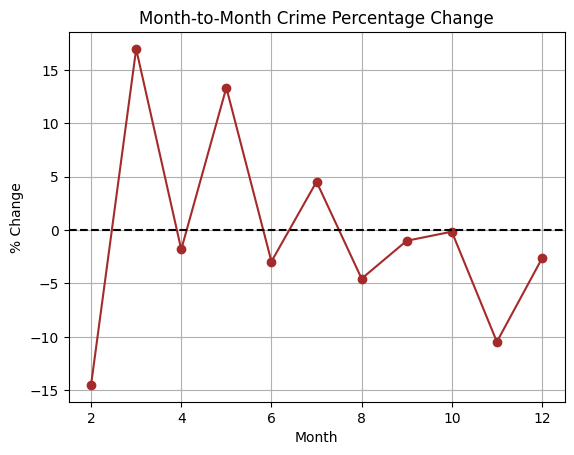

In [28]:
monthly_trends['Pct_Change'] = monthly_trends['Total_Crimes'].pct_change() * 100

plt.plot(monthly_trends['Month'], monthly_trends['Pct_Change'], marker='o', color='brown')
plt.axhline(0, color='black', linestyle='--')
plt.title("Month-to-Month Crime Percentage Change")
plt.xlabel("Month")
plt.ylabel("% Change")
plt.grid()
plt.show()

<h2>Insight 7: Heatmap of crimes by month and year</h2>

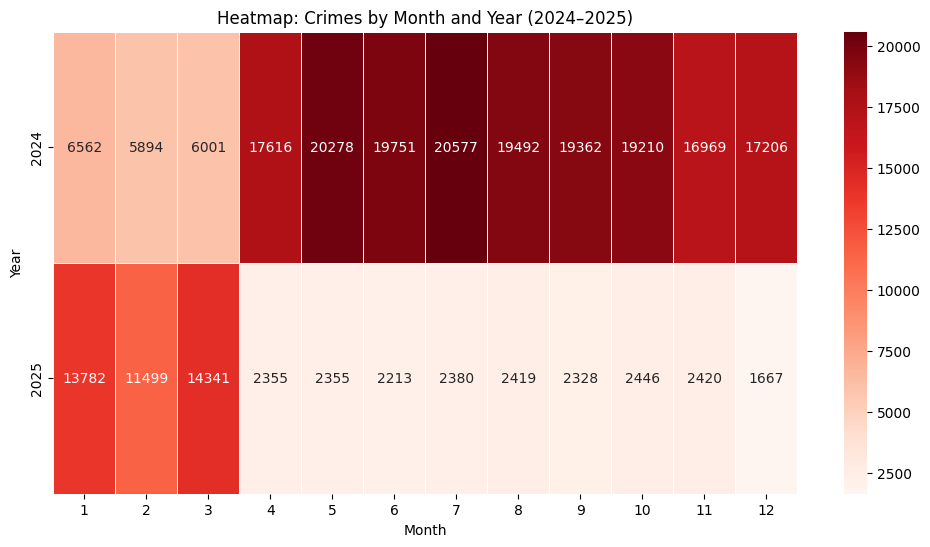

In [29]:
monthly_heat = df.groupby(['Year','Month']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(monthly_heat, cmap="Reds", annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap: Crimes by Month and Year (2024–2025)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

<h2>Overall, the monthly analysis shows that crime in Chicago rises during warmer months, dips in colder months, and follows a repeating seasonal pattern that highlights the importance of time-based crime prevention strategies.</h2>